In [1]:
import pandas as pd
# 데이터 불러오기
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [5]:
# 데이터 preview
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


# 훈련 데이터와 테스트 데이터 나누기

In [6]:
# 어떤 종의 생선이 있을까?
fish['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [10]:
# 타깃을 제외한 나머지 컬럼을 입력 데이터로 만든다.
# 타깃이 생선 종류 맞죠..?
# input 데이터 생성
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [11]:
# 타깃 데이터를 출력 데이터로 만든다.
# output 데이터 생성
fish_output= fish['Species']

In [14]:
# 훈련 데이터 (input data)와 테스트 데이터 (output data) 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_output, random_state=42)

# 훈련데이터와 테스트 데이터 세트를 표준화 전처리

In [15]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## 확률적경사 하강법

In [16]:
from sklearn.linear_model import SGDClassifier

In [17]:
# 사이킷런 1.1.0 버전 이하일 경우 'log_loss'를 'log'로 바꾸어 주세요.
# Q1. 로지스틱 손실 함수 지정
# Q2. 에포크 횟수 10회 지정
# random_state=42로 지정한다

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [26]:
# 10회는 ㅂㄹ였으니까 더 훈련시켜보자!
sc = SGDClassifier(loss='log', max_iter=50, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8403361344537815
0.8


## 에포크와 과대/과소적합

In [27]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [32]:
# 300번의 에포크 동안 훈련을 반복하여 진행해보기
# 반복마다 훈련 세트와 테스트 세트의 점수를 계산하여 train_score,test_score 리스트에 추가
# 왜 sc.fit이 아니라 sc.partial fit을 사용하는 걸까
# partial_fit은 이미 손실함수가 구해진 상태에서 추가로 손실함수를 구하기 위해서 사용됨

for i in range(0,300):
   sc.partial_fit(train_scaled, train_target, classes=classes)
   train_score.append(sc.score(train_scaled, train_target))
   test_score.append(sc.score(test_scaled, test_target))

# 시각화

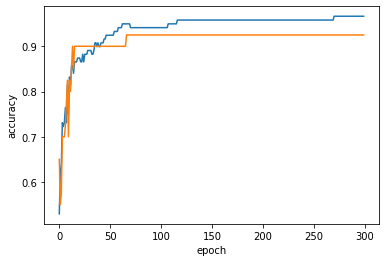

In [33]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

1. SGDClassifier의 반복 횟수를 100에 맞추고 다시 훈련시키기
2. 최종적으로 훈련 세트와 테스트 세트 점수 출력하기

In [39]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [52]:
for i in range(0,100):
   sc.partial_fit(train_scaled, train_target, classes=classes)
   train_score.append(sc.score(train_scaled, train_target))
   test_score.append(sc.score(test_scaled, test_target))

print(train_score)
print(test_score)

[0.5294117647058824, 0.6218487394957983, 0.6386554621848739, 0.7310924369747899, 0.7226890756302521, 0.7310924369747899, 0.7647058823529411, 0.7310924369747899, 0.8151260504201681, 0.7478991596638656, 0.8319327731092437, 0.8151260504201681, 0.8571428571428571, 0.8571428571428571, 0.8403361344537815, 0.865546218487395, 0.865546218487395, 0.865546218487395, 0.8739495798319328, 0.8739495798319328, 0.8739495798319328, 0.865546218487395, 0.865546218487395, 0.8823529411764706, 0.865546218487395, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8907563025210085, 0.8907563025210085, 0.8907563025210085, 0.8907563025210085, 0.8823529411764706, 0.8823529411764706, 0.8907563025210085, 0.907563025210084, 0.907563025210084, 0.8991596638655462, 0.907563025210084, 0.8991596638655462, 0.8991596638655462, 0.907563025210084, 0.907563025210084, 0.907563025210084, 0.9159663865546218, 0.9159663865546218, 0.9243697478991597, 0.9243697478991597, 0.9243697478991597, 0.9243697478991597, 0.924369747